# Create and Register a new Dataset

This Notebook creates a new dataset with dummy house-prices data. It then uploads and registers this dataset to the AzureML Workspace.

It uses the Worspace's default Datastore to upload the CSV file. Typically this is the Blob Storage Account created with the AzureML Workspace.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

## Generate Training Data

In [2]:
# Settings
ss_train = 250
weights = np.array([1.5, 2.1, 1.1])

In [3]:
# Generate features
df = pd.DataFrame({
    "rooms": np.random.randint(3, 10, ss_train),
    "house_m2": np.random.randint(50, 250, ss_train),
    "garden_m2": np.random.randint(10, 300, ss_train),
})

In [4]:
# Generate labels
df["price"] = df.values @ weights + np.random.normal(0, 13, ss_train)

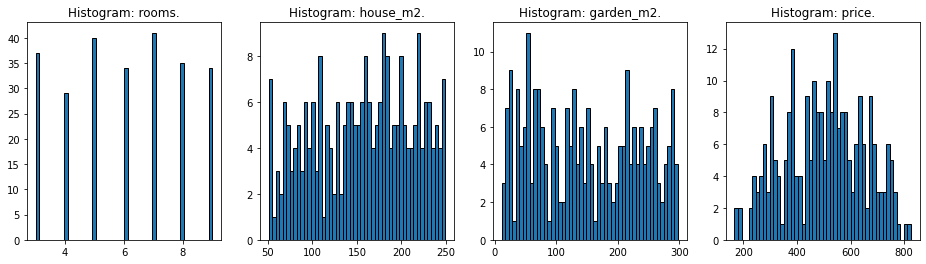

In [5]:
# Plot histograms for all variables
fig, axes = plt.subplots(1, len(df.columns), figsize=(16, 4))
for idx, col in enumerate(df.columns):
    axes[idx].hist(df[col], bins=50, edgecolor="black")
    axes[idx].set_title(f"Histogram: {col}.")

## Register as AzureML Dataset

In [6]:
from azureml.core import Workspace, Datastore, Dataset

In [7]:
# Connect Workspace and get default Datastore
ws = Workspace.from_config()
datastore = ws.get_default_datastore()

datastore

{
  "name": "workspaceblobstore",
  "container_name": "azureml-blobstore-fa8271ca-7fb0-4214-88a7-b196f8d44ed7",
  "account_name": "azuremlpocluka4939292542",
  "protocol": "https",
  "endpoint": "core.windows.net"
}

In [8]:
# Store as file then upload to the Datastore
df.to_csv("dummy_data/house_prices.csv", index=False)

datastore.upload(src_dir="dummy_data", target_path="dummy_data", overwrite=True)
houses_ds = Dataset.Tabular.from_delimited_files(datastore.path("dummy_data/house_prices.csv"))


Uploading an estimated of 1 files
Uploading dummy_data/house_prices.csv
Uploaded dummy_data/house_prices.csv, 1 files out of an estimated total of 1
Uploaded 1 files


In [9]:
# Optional: Register Dataset in the Workspace
houses_ds.register(
    ws,
    name="house_prices",
    description="Dummy house pricing dataset",
    create_new_version=True,
)

{
  "source": [
    "('workspaceblobstore', 'dummy_data/house_prices.csv')"
  ],
  "definition": [
    "GetDatastoreFiles",
    "ParseDelimited",
    "DropColumns",
    "SetColumnTypes"
  ],
  "registration": {
    "id": "7096545e-dbd1-4a0c-9f5c-9b9cafc408a0",
    "name": "house_prices",
    "version": 1,
    "description": "Dummy house pricing dataset",
    "workspace": "Workspace.create(name='azureml-poc-lukas', subscription_id='329548f5-859c-4f2a-a884-472706106fbb', resource_group='azureml-poc-lukas')"
  }
}

### Check Registered Datasets

In [10]:
# Print all registered datasets
for name, reg in Dataset.get_all(ws).items():
    print(f"Dataset: {name} - Version: {reg.version} - Description: {reg.description}")


Dataset: house_prices - Version: 1 - Description: Dummy house pricing dataset
